In [1]:
import random, math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1000)
'''
## TEST DATA
classA = np.concatenate(
(np.random.randn(10, 2)*0.3 + [1.5, 0.5],
 np.random.randn(10, 2)*0.7 + [-1.5, 0.5]))

classB = np.random.randn(10, 2)*0.5 + [0, 1]
'''

classA = np.concatenate(
(np.random.randn(10, 2)*0.2 + [1.5, 0.5],
 np.random.randn(10, 2)*0.2 + [-1.5, 0.5]))

classB = np.random.randn(10, 2)*0.2 +[0.0, -0.5]


inputs = np.concatenate((classA, classB))

targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))

random.shuffle(permute)

inputs = inputs[permute, :]

targets = targets[permute]


In [3]:
##test simple points

#inputs = ([1, 0.5],[-1, -0.5])
#targets = (1, -1)
#N = 2

In [4]:
# kernel functions
def linearKernel(x,y):
    return np.dot(x,y)

def polyKernel(x,y,p=3):
    return np.power((np.dot(x,y)+1),p)   

def RBFKernel(x,y,sigma=2):
    return math.exp(-math.pow(np.linalg.norm(np.subtract(x, y)), 2)/(2 * math.pow(sigma, 2)))
    #d = np.subtract(x, y)
   # return math.exp(-(np.dot(d, d))/(2 * math.pow(sigma, 2)))


In [41]:
Kernel = RBFKernel  # we can change the kernerl here.

P = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        P[i, j] = targets[i] * targets[j] * Kernel(inputs[i], inputs[j])
        

In [42]:
def objective(a):
    cost = 0.5*np.dot(a,np.dot(a,P))-np.sum(a)
    return cost

def zerofun(a):
    return np.dot(a, targets)

In [49]:
C = 1000  # we can change the value of C here.

start = np.zeros(N)

#B = [(0, None) for b in range(N)]

##using slack
B = [(0, C) for b in range(N)]

XC = {'type':'eq', 'fun': zerofun}

ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']

#nonzero = [(alpha[i], inputs[i], targets[i]) for i in range(N) if abs(alpha[i]) > 10e-5]

## using slack
nonzero = [(alpha[i], inputs[i], targets[i]) for i in range(N) if abs(alpha[i]) > 10e-5 and abs(alpha[i])<C]

nonzero


[(2.906068290636977, array([-1.5157318 ,  0.38358686]), 1.0),
 (8.822833884376918, array([1.26078603, 0.41880797]), 1.0),
 (11.728902175013888, array([ 0.51495184, -0.28535734]), -1.0)]

In [50]:
def bValue():
    bsum = 0
    for item in nonzero:
        bsum += item[0] * item[2] * Kernel(item[1], nonzero[1][1])
    return bsum - nonzero[1][2]
        
def indicator(x, y, b):
    totsum = 0
    for item in nonzero:
        totsum += item[0] * item[2] * Kernel([x, y], item[1])
    return totsum - b

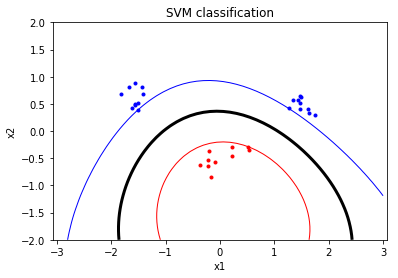

In [51]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

#test simple points
#plt.plot([i[0] for i in inputs], [i[1] for i in inputs], 'b.')

b = bValue()
xgrid = np.linspace(-3, 3)
ygrid = np.linspace(-2, 2)
grid = np.array([[indicator(x,y,b) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, 
           (-1.0, 0.0, 1.0),
           colors=('red', 'black', 'blue'),
           linewidths=(1, 3, 1))

plt.axis('equal')
#plt.savefig('svmplot-RBF-C4-SIGMA10.pdf')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM classification')
plt.show()